# Notebook de implementación

In [1]:
from utils import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.0 MB/s eta 0:00:00
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

## Lectura de los CSVs

In [12]:
# Lectura de los datasets de MELD
file_paths_MELD = ['train/train_sent_emo.csv', 'dev_sent_emo.csv']
df_train_MELD, df_dev_MELD = read_csvs(file_paths_MELD, 'MELD')

# Lectura de los datasets de MOSEI
file_paths_MOSEI = ['Labels/Data_Train_modified.csv', 'Labels/Data_Val_modified.csv', 'Labels/Data_Test_modified.csv']
df_train_MOSEI, df_dev_MOSEI, df_test_MOSEI = read_csvs(file_paths_MOSEI, 'MOSEI')

In [13]:
# Se muestran las dimensiones originales de los dataframes cargados
lista_dfs = [df_train_MELD, df_dev_MELD, df_train_MOSEI, df_dev_MOSEI, df_test_MOSEI]
name_dfs = ['Train MELD', 'Dev MELD', 'Train MOSEI', 'Dev MOSEI', 'Test MOSEI']
shape_dfs(lista_dfs, name_dfs)

Train MELD tiene 9989 filas y 11 columnas
Dev MELD tiene 1109 filas y 11 columnas
Train MOSEI tiene 16274 filas y 12 columnas
Dev MOSEI tiene 1861 filas y 12 columnas
Test MOSEI tiene 4653 filas y 12 columnas


## Limpieza de los Dataframes

In [14]:
# Limpieza de MELD
df_train_MELD_clean = clean_dfs(df_train_MELD, 'MELD', 'train')
df_dev_MELD_clean = clean_dfs(df_dev_MELD, 'MELD', 'dev')

# Limpieza de MOSEI
df_train_MOSEI_clean = clean_dfs(df_train_MOSEI, 'MOSEI', 'train')
df_dev_MOSEI_clean = clean_dfs(df_dev_MOSEI, 'MOSEI', 'train')
df_test_MOSEI_clean = clean_dfs(df_test_MOSEI, 'MOSEI', 'train')

df_train_MOSEI_clean, df_dev_MOSEI_clean, df_test_MOSEI_clean = encode_MOSEI_video_column([df_train_MOSEI_clean, 
                                                                                              df_dev_MOSEI_clean, 
                                                                                              df_test_MOSEI_clean])

## Adecuación y Normalización de los Dataframes

La columna Sentiment se adecuará y normalizará de la siguiente forma:
* Negativo = 0
* Neutral = 1
* Positivo = 2

In [15]:
# Adecuación y normalización de MELD
df_train_MELD_normalized, meld_emotion_scale = normalize_emotion_and_sentiment(df_train_MELD_clean, 'MELD')
df_dev_MELD_normalized, _ = normalize_emotion_and_sentiment(df_dev_MELD_clean, 'MELD')

# Adecuación y normalización de MOSEI
df_train_MOSEI_normalized, _ = normalize_emotion_and_sentiment(df_train_MOSEI_clean, 'MOSEI')
df_dev_MOSEI_normalized, _ = normalize_emotion_and_sentiment(df_dev_MOSEI_clean, 'MOSEI')
df_test_MOSEI_normalized, _ = normalize_emotion_and_sentiment(df_test_MOSEI_clean, 'MOSEI')

Emociones en MELD: {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}
Emociones en MELD: {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}


## Preprocesar el texto

### Preprocesamiento básico del texto
* Se pone en minúsculas el texto
* Se limpian las palabras repetidas y las onomotopeyas
* Se eliminan los símbolos extraños
* Se expanden las contracciones

In [16]:
# Preprocesamos de forma básica MELD
df_train_MELD_basic = preprocess_text_column(df_train_MELD_normalized)
df_dev_MELD_basic = preprocess_text_column(df_dev_MELD_normalized)

# Preprocesamos de forma básica MOSEI
df_train_MOSEI_basic = preprocess_text_column(df_train_MOSEI_normalized)
df_dev_MOSEI_basic = preprocess_text_column(df_dev_MOSEI_normalized)
df_test_MOSEI_basic = preprocess_text_column(df_test_MOSEI_normalized)

### Tratamiento de los n-gramas de tipo stopwords

In [17]:
try:
    # Se intenta cargar el fichero json con los n-gramas de tipo stopword
    with open("stopword_ngrams.json", "r", encoding="utf-8") as f:
        stopword_ngrams = set(json.load(f))
    print(f"Se han cargado {len(stopword_ngrams)} n-gramas de tipo stopwords")
except (FileNotFoundError, json.JSONDecodeError):
    # Mensaje de advertencia de que no existe la lista de n-gramas de tipo stopword
    print("No se pudo cargar el fichero. Generando la lista de nuevo...")
    
    # Se listas todos los dataframes disponibles
    dfs_basic = [df_train_MELD_basic, df_dev_MELD_basic, df_train_MOSEI_basic, df_dev_MOSEI_basic, df_test_MOSEI_basic]
    
    # Se crea el corpus de los textos disponibles
    corpus = load_texts_from_dfs(dfs_basic)
    
    # Se extraen los n-gramas de tipo stopword a partir del corpus
    ngrams = extract_stopword_ngrams_corpus(corpus)
    
    # Se guardan los n-gramas de tipo stopword en un fichero json
    save_stopword_ngrams_corpus(ngrams)
    stopword_ngrams = set(ngrams)

    # Mensaje de advertencia de que no existe la lista de n-gramas de tipo stopword
    print("La lista de n-gramas de tipo stopword ha sido generada y guardada")

Se han cargado 15381 n-gramas de tipo stopwords


In [18]:
# Se aplica la limpieza de n-gramas de tipo stopword a los dataframes de MELD
df_train_MELD_ngrams = remove_stopword_ngrams_from_dfs(df_train_MELD_basic, stopword_ngrams, 6, 'Train MELD')
df_dev_MELD_ngrams = remove_stopword_ngrams_from_dfs(df_dev_MELD_basic, stopword_ngrams, 6, 'Dev MELD')

# Se aplica la limpieza de n-gramas de tipo stopword a los dataframes de MOSEI
df_train_MOSEI_ngrams = remove_stopword_ngrams_from_dfs(df_train_MOSEI_basic, stopword_ngrams, 6, 'Train MOSEI')
df_dev_MOSEI_ngrams = remove_stopword_ngrams_from_dfs(df_dev_MOSEI_basic, stopword_ngrams, 6, 'Dev MOSEI')
df_test_MOSEI_ngrams = remove_stopword_ngrams_from_dfs(df_test_MOSEI_basic, stopword_ngrams, 6, 'Test MOSEI')

Se han eliminado 144 filas con texto vacío. Train MELD ahora tiene un shape (9845, 9)
Se han eliminado 22 filas con texto vacío. Dev MELD ahora tiene un shape (1087, 9)
Se han eliminado 14 filas con texto vacío. Train MOSEI ahora tiene un shape (16260, 15)
Se han eliminado 0 filas con texto vacío. Dev MOSEI ahora tiene un shape (1861, 15)
Se han eliminado 3 filas con texto vacío. Test MOSEI ahora tiene un shape (4650, 15)


#### Tranamiento de las stopwords simples

In [19]:
# Se aplica la limpieza de stopword simples a los dataframes de MELD
df_train_MELD_stop = remove_stopwords_single_from_dfs(df_train_MELD_ngrams, 'Train MELD')
df_dev_MELD_stop = remove_stopwords_single_from_dfs(df_dev_MELD_ngrams, 'Dev MELD')

# Se aplica la limpieza de stopword simples a los dataframes de MOSEI
df_train_MOSEI_stop = remove_stopwords_single_from_dfs(df_train_MOSEI_ngrams, 'Train MOSEI')
df_dev_MOSEI_stop = remove_stopwords_single_from_dfs(df_dev_MOSEI_ngrams, 'Dev MOSEI')
df_test_MOSEI_stop = remove_stopwords_single_from_dfs(df_test_MOSEI_ngrams, 'Test MOSEI')

Se han eliminado 316 filas con texto vacío. Train MELD ahora tiene un shape (9529, 9)
Se han eliminado 40 filas con texto vacío. Dev MELD ahora tiene un shape (1047, 9)
Se han eliminado 14 filas con texto vacío. Train MOSEI ahora tiene un shape (16246, 15)
Se han eliminado 1 filas con texto vacío. Dev MOSEI ahora tiene un shape (1860, 15)
Se han eliminado 2 filas con texto vacío. Test MOSEI ahora tiene un shape (4648, 15)


#### Eliminación de frases de 1 palabra

In [20]:
df_train_MELD_stop = filter_short_texts(df_train_MELD_stop, 'Train MELD', min_words = 2)
df_dev_MELD_stop = filter_short_texts(df_dev_MELD_stop, 'Train MELD', min_words = 2)
df_train_MOSEI_stop = filter_short_texts(df_train_MOSEI_stop, 'Train MELD', min_words = 2)
df_dev_MOSEI_stop = filter_short_texts(df_dev_MOSEI_stop, 'Train MELD', min_words = 2)
df_test_MOSEI_stop = filter_short_texts(df_test_MOSEI_stop, 'Train MELD', min_words = 2)

df_train_MELD_stop = df_train_MELD_stop.drop(columns = ['index'])
df_dev_MELD_stop = df_dev_MELD_stop.drop(columns = ['index'])
df_train_MOSEI_stop = df_train_MOSEI_stop.drop(columns = ['index'])
df_dev_MOSEI_stop = df_dev_MOSEI_stop.drop(columns = ['index'])
df_test_MOSEI_stop = df_test_MOSEI_stop.drop(columns = ['index'])

Train MELD pasa de 9529 filas a tener 7452 filas.
Train MELD pasa de 1047 filas a tener 825 filas.
Train MELD pasa de 16246 filas a tener 15915 filas.
Train MELD pasa de 1860 filas a tener 1828 filas.
Train MELD pasa de 4648 filas a tener 4546 filas.


#### Creación de MELD test
Dado que los ficheros de audio de MELD para test están corruptos en el origen (Github), se creará un dataset de test a partir del dataframe de train y se guardará como fichero. 

In [21]:
# Se extrae el df de Test de MELD a partir del df de Train y
# si la división ya existe, se leerá de los ficheros guardados
df_train_MELD_stop, df_test_MELD_stop = get_meld_test(df_train_MELD_stop, 0.1)

# Se muestran las dimensiones de los nuevos dataframes
lista_MELD_dfs = [df_train_MELD_stop, df_test_MELD_stop]
name_MELD_dfs = ['Train MELD', 'Test MELD']
shape_dfs(lista_MELD_dfs, name_MELD_dfs)

Cargando splits ya existentes...
Train MELD tiene 6706 filas y 11 columnas
Test MELD tiene 746 filas y 11 columnas


#### Data Augmentation

In [22]:
# Data Augmentation para MELD
df_train_MELD_augmented = augment_dataframe_balanced(df_train_MELD_stop)

# Data Augmentation para MOSEI
df_train_MOSEI_augmented = augment_dataframe_balanced(df_train_MOSEI_stop)


 Resultado del balanceo:
- Tamaño original del dataset: 6706
- Tamaño después del augmentación: 9351
- Número de muestras por clase antes del balanceo: sentiment
0    2041
1    3117
2    1548
Name: count, dtype: int64
- Número de muestras por clase después del balanceo: sentiment
0    3117
1    3117
2    3117
Name: count, dtype: int64

 Resultado del balanceo:
- Tamaño original del dataset: 15915
- Tamaño después del augmentación: 23778
- Número de muestras por clase antes del balanceo: sentiment
0.0    4578
1.0    3411
2.0    7926
Name: count, dtype: int64
- Número de muestras por clase después del balanceo: sentiment
0.0    7926
1.0    7926
2.0    7926
Name: count, dtype: int64


#### Feature Engeeniring

In [23]:
# Feature Engineering para MELD
df_train_MELD_features = feature_engineering_MELD(df_train_MELD_augmented)
df_dev_MELD_features = feature_engineering_MELD(df_dev_MELD_stop)
df_test_MELD_features = feature_engineering_MELD(df_test_MELD_stop)

# Feature Engineering para MELD
df_train_MOSEI_features = feature_engineering_MOSEI(df_train_MOSEI_augmented)
df_dev_MOSEI_features = feature_engineering_MOSEI(df_dev_MOSEI_stop)
df_test_MOSEI_features = feature_engineering_MOSEI(df_test_MOSEI_stop)

#### Guardado de los dataframes resultantes del preprocesamiento

In [24]:
# Guardado para MELD
df_train_MELD_features.to_csv("MELD_train.csv", index = False)
df_dev_MELD_features.to_csv("MELD_dev.csv", index = False)
df_test_MELD_features.to_csv("MELD_test.csv", index = False)

# Guardado para MOSEI
df_train_MOSEI_features.to_csv("MOSEI_train.csv", index = False)
df_dev_MOSEI_features.to_csv("MOSEI_dev.csv", index = False)
df_test_MOSEI_features.to_csv("MOSEI_test.csv", index = False)

## Preparación de los datos para los modelos

### Reducción de columnas para el entreno

In [25]:
# Reducción del número de columnas para MELD
df_train_MELD_reduced = df_train_MELD_stop.drop(columns = ['video_path'])
df_dev_MELD_reduced = df_dev_MELD_stop.drop(columns = ['video_path'])
df_test_MELD_reduced = df_test_MELD_stop.drop(columns = ['video_path'])

# Reducción del número de columnas para MOSEI
df_train_MOSEI_reduced = df_train_MOSEI_stop.drop(columns = ['video', 'audio_name', 'video_path'])
df_dev_MOSEI_reduced = df_dev_MOSEI_stop.drop(columns = ['video', 'audio_name', 'video_path'])
df_test_MOSEI_reduced = df_test_MOSEI_stop.drop(columns = ['video', 'audio_name', 'video_path'])

### Definición de las features, el texto y las etiquetas de cada dataset

In [26]:
# Features, texto y etiquetas para MELD
features_MELD = ['Emotion', 
                 'duration',  
                 'dialogue_id_norm', 
                 'utterance_id_norm', 
                 'season_norm',
                 'polarity',
                 'subjectivity']
text_train_MELD, labels_train_MELD, features_train_MELD = prepare_text_feature_label_data(df_train_MELD_features, features_MELD)
text_dev_MELD, labels_dev_MELD, features_dev_MELD = prepare_text_feature_label_data(df_dev_MELD_features, features_MELD)
text_test_MELD, labels_test_MELD, features_test_MELD = prepare_text_feature_label_data(df_test_MELD_features, features_MELD)

# Features, texto y etiquetas para MOSEI
features_MOSEI = ['start_time', 
                  'end_time', 
                  'happy', 
                  'sad', 
                  'disgust', 
                  'neutral', 
                  'video_encoded', 
                  'duration', 
                  'intensity', 
                  'dominant_emotion', 
                  'positive_emotions', 
                  'polarity',
                  'subjectivity']
text_train_MOSEI, labels_train_MOSEI, features_train_MOSEI = prepare_text_feature_label_data(df_train_MOSEI_features, features_MOSEI)
text_dev_MOSEI, labels_dev_MOSEI, features_dev_MOSEI = prepare_text_feature_label_data(df_dev_MOSEI_features, features_MOSEI)
text_test_MOSEI, labels_test_MOSEI, features_test_MOSEI = prepare_text_feature_label_data(df_test_MOSEI_features, features_MOSEI)

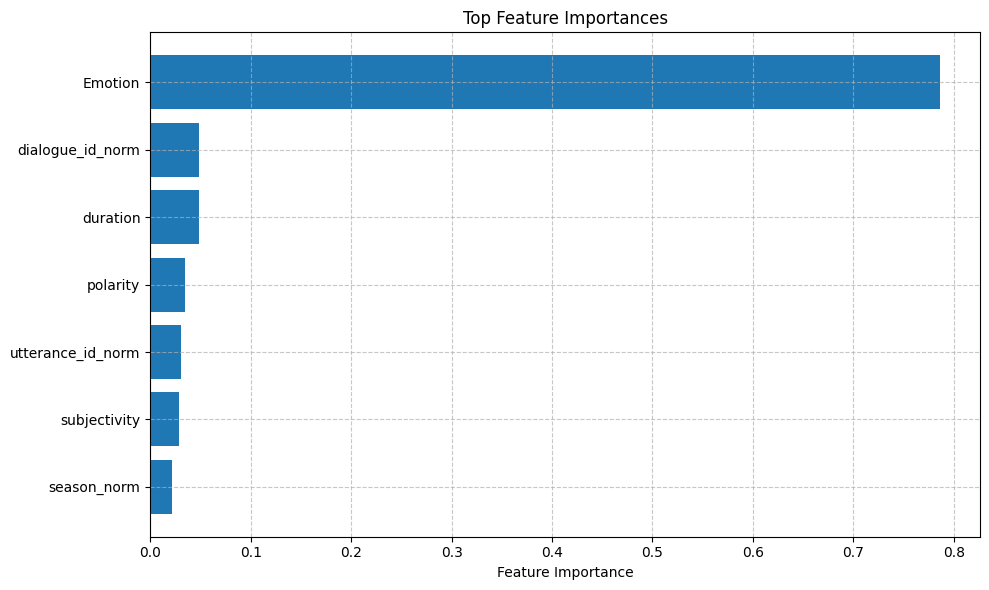

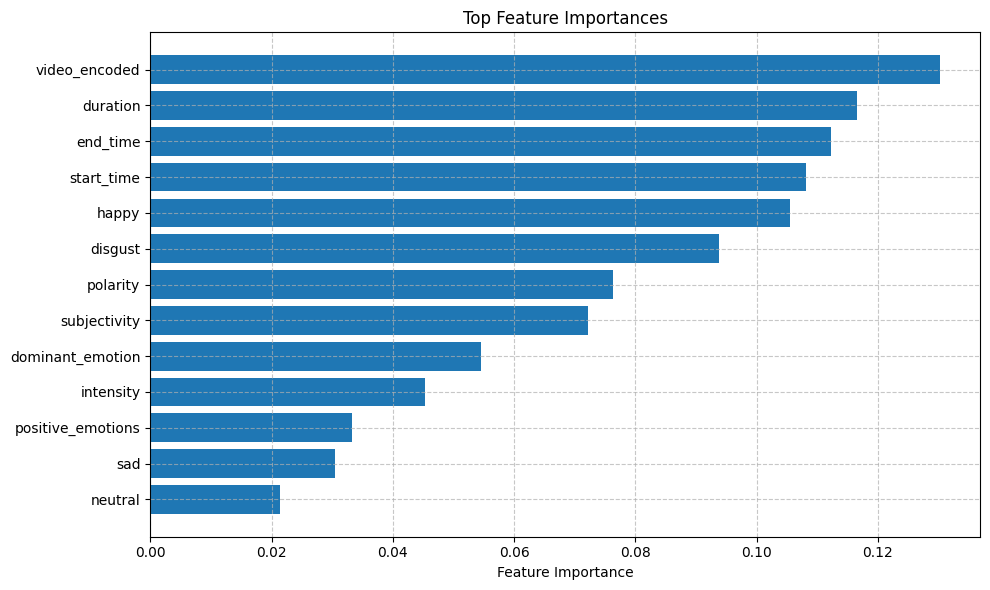

In [27]:
# Feature importance en MELD
plot_feature_importance(features_train_MELD, labels_train_MELD, feature_names = features_MELD, top_n = len(features_MELD))
 
# Feature importance en MOSEI
plot_feature_importance(features_train_MOSEI, labels_train_MOSEI, feature_names = features_MOSEI, top_n = len(features_MOSEI))

### Definición de los datasets finales
Los datasets finales se crearán mezclando las siguientes posibilidades:
1.  Tokenizer: bert, roberta, xlnet, bertweet o twitter-roberta
2.  Dataset: MELD o MOSEI
3.  Split: train, dev o test

In [28]:
# Se calcula el max_len de cada combinación de dataset y modelo
# Primero, MELD
max_len_MELD_BERT = measure_max_len(tokenizers["bert"], [text_train_MELD, text_dev_MELD, text_test_MELD], 'MELD', 'BERT')
max_len_MELD_ROBERTA = measure_max_len(tokenizers["roberta"], [text_train_MELD, text_dev_MELD, text_test_MELD], 'MELD', 'ROBERTA')
max_length_MELD_XLNET = measure_max_len(tokenizers["xlnet"], [text_train_MELD, text_dev_MELD, text_test_MELD], 'MELD', 'XLNET')
max_len_MELD_BERTWEET = measure_max_len(tokenizers["bertweet"], [text_train_MELD, text_dev_MELD, text_test_MELD], 'MELD', 'bertweet')
max_len_MELD_ROBERTA_TWEET = measure_max_len(tokenizers["twitter-roberta"], [text_train_MELD, text_dev_MELD, text_test_MELD], 'MELD', 'ROBERTA twitter')

# Segundo, MOSEI
max_len_MOSEI_BERT = measure_max_len(tokenizers["bert"], [text_train_MOSEI, text_dev_MOSEI, text_test_MOSEI], 'MOSEI', 'BERT')
max_len_MOSEI_ROBERTA = measure_max_len(tokenizers["roberta"], [text_train_MOSEI, text_dev_MOSEI, text_test_MOSEI], 'MOSEI', 'ROBERTA')
max_len_MOSEI_XLNET = measure_max_len(tokenizers["xlnet"], [text_train_MOSEI, text_dev_MOSEI, text_test_MOSEI], 'MOSEI', 'XLNET')
max_len_MOSEI_BERTWEET = measure_max_len(tokenizers["bertweet"], [text_train_MOSEI, text_dev_MOSEI, text_test_MOSEI], 'MOSEI', 'bertweet')
max_len_MOSEI_ROBERTA_TWEET = measure_max_len(tokenizers["twitter-roberta"], [text_train_MOSEI, text_dev_MOSEI, text_test_MOSEI], 'MOSEI', 'ROBERTA twitter')

Max token length for MELD: 36
Model BERT max token length: 512
Max token length for MELD: 37
Model ROBERTA max token length: 512
Max token length for MELD: 47
Model XLNET max token length: 1000000000000000019884624838656
Max token length for MELD: 37
Model bertweet max token length: 128
Max token length for MELD: 37
Model ROBERTA twitter max token length: 1000000000000000019884624838656
Max token length for MOSEI: 167
Model BERT max token length: 512
Max token length for MOSEI: 180
Model ROBERTA max token length: 512
Max token length for MOSEI: 189
Model XLNET max token length: 1000000000000000019884624838656
Max token length for MOSEI: 163
Model bertweet max token length: 128
Max token length for MOSEI: 180
Model ROBERTA twitter max token length: 1000000000000000019884624838656


In [29]:
# Se definen todos los datasets posibles

''' BERT '''
# MELD
train_dataset_MELD_BERT = SentimentDataset(text_train_MELD, features_train_MELD, labels_train_MELD, tokenizers["bert"], max_len_MELD_BERT)
dev_dataset_MELD_BERT = SentimentDataset(text_dev_MELD, features_dev_MELD, labels_dev_MELD, tokenizers["bert"], max_len_MELD_BERT)
test_dataset_MELD_BERT = SentimentDataset(text_test_MELD, features_test_MELD, labels_test_MELD, tokenizers["bert"], max_len_MELD_BERT)

# MOSEI
train_dataset_MOSEI_BERT = SentimentDataset(text_train_MOSEI, features_train_MOSEI, labels_train_MOSEI, tokenizers["bert"], max_len_MOSEI_BERT)
dev_dataset_MOSEI_BERT = SentimentDataset(text_dev_MOSEI, features_dev_MOSEI, labels_dev_MOSEI, tokenizers["bert"], max_len_MOSEI_BERT)
test_dataset_MOSEI_BERT = SentimentDataset(text_test_MOSEI, features_test_MOSEI, labels_test_MOSEI, tokenizers["bert"], max_len_MOSEI_BERT)

''' ROBERTA '''
# MELD
train_dataset_MELD_ROBERTA = SentimentDataset(text_train_MELD, features_train_MELD, labels_train_MELD, tokenizers["roberta"], max_len_MELD_ROBERTA)
dev_dataset_MELD_ROBERTA = SentimentDataset(text_dev_MELD, features_dev_MELD, labels_dev_MELD, tokenizers["roberta"], max_len_MELD_ROBERTA)
test_dataset_MELD_ROBERTA = SentimentDataset(text_test_MELD, features_test_MELD, labels_test_MELD, tokenizers["roberta"], max_len_MELD_ROBERTA)

# MOSEI
train_dataset_MOSEI_ROBERTA = SentimentDataset(text_train_MOSEI, features_train_MOSEI, labels_train_MOSEI, tokenizers["roberta"], max_len_MOSEI_ROBERTA)
dev_dataset_MOSEI_ROBERTA = SentimentDataset(text_dev_MOSEI, features_dev_MOSEI, labels_dev_MOSEI, tokenizers["roberta"], max_len_MOSEI_ROBERTA)
test_dataset_MOSEI_ROBERTA = SentimentDataset(text_test_MOSEI, features_test_MOSEI, labels_test_MOSEI, tokenizers["roberta"], max_len_MOSEI_ROBERTA)

''' BERTWEET '''
# MELD
train_dataset_MELD_BERTWEET = SentimentDataset(text_train_MELD, features_train_MELD, labels_train_MELD, tokenizers["bertweet"], max_len_MELD_BERTWEET)
dev_dataset_MELD_BERTWEET = SentimentDataset(text_dev_MELD, features_dev_MELD, labels_dev_MELD, tokenizers["bertweet"], max_len_MELD_BERTWEET)
test_dataset_MELD_BERTWEET = SentimentDataset(text_test_MELD, features_test_MELD, labels_test_MELD, tokenizers["bertweet"], max_len_MELD_BERTWEET)

# MOSEI
train_dataset_MOSEI_BERTWEET = SentimentDataset(text_train_MOSEI, features_train_MOSEI, labels_train_MOSEI, tokenizers["bertweet"], max_len_MOSEI_BERTWEET)
dev_dataset_MOSEI_BERTWEET = SentimentDataset(text_dev_MOSEI, features_dev_MOSEI, labels_dev_MOSEI, tokenizers["bertweet"], max_len_MOSEI_BERTWEET)
test_dataset_MOSEI_BERTWEET = SentimentDataset(text_test_MOSEI, features_test_MOSEI, labels_test_MOSEI, tokenizers["bertweet"], max_len_MOSEI_BERTWEET)

''' TWITTER-ROBERTA '''
# MELD
train_dataset_MELD_ROBERTA_TWEET = SentimentDataset(text_train_MELD, features_train_MELD, labels_train_MELD, tokenizers["twitter-roberta"], max_len_MELD_ROBERTA_TWEET)
dev_dataset_MELD_ROBERTA_TWEET = SentimentDataset(text_dev_MELD, features_dev_MELD, labels_dev_MELD, tokenizers["twitter-roberta"], max_len_MELD_ROBERTA_TWEET)
test_dataset_MELD_ROBERTA_TWEET = SentimentDataset(text_test_MELD, features_test_MELD, labels_test_MELD, tokenizers["twitter-roberta"], max_len_MELD_ROBERTA_TWEET)

# MOSEI
train_dataset_MOSEI_ROBERTA_TWEET = SentimentDataset(text_train_MOSEI, features_train_MOSEI, labels_train_MOSEI, tokenizers["twitter-roberta"], max_len_MOSEI_ROBERTA_TWEET)
dev_dataset_MOSEI_ROBERTA_TWEET = SentimentDataset(text_dev_MOSEI, features_dev_MOSEI, labels_dev_MOSEI, tokenizers["twitter-roberta"], max_len_MOSEI_ROBERTA_TWEET)
test_dataset_MOSEI_ROBERTA_TWEET = SentimentDataset(text_test_MOSEI, features_test_MOSEI, labels_test_MOSEI, tokenizers["twitter-roberta"], max_len_MOSEI_ROBERTA_TWEET)

#### Creación de los Dataloaders

In [30]:
# Se definen todos los dataloaders posibles

''' BERT '''
# MELD
train_dataloader_MELD_BERT = DataLoader(train_dataset_MELD_BERT, batch_size = 32, shuffle = True)
dev_dataloader_MELD_BERT = DataLoader(dev_dataset_MELD_BERT, batch_size = 32)
test_dataloader_MELD_BERT = DataLoader(test_dataset_MELD_BERT, batch_size = 32)

# MOSEI
train_dataloader_MOSEI_BERT = DataLoader(train_dataset_MOSEI_BERT, batch_size = 32, shuffle = True)
dev_dataloader_MOSEI_BERT = DataLoader(dev_dataset_MOSEI_BERT, batch_size = 32)
test_dataloader_MOSEI_BERT = DataLoader(test_dataset_MOSEI_BERT, batch_size = 32)

''' ROBERTA '''
# MELD
train_dataloader_MELD_ROBERTA = DataLoader(train_dataset_MELD_ROBERTA, batch_size = 32, shuffle = True)
dev_dataloader_MELD_ROBERTA = DataLoader(dev_dataset_MELD_ROBERTA, batch_size = 32)
test_dataloader_MELD_ROBERTA = DataLoader(test_dataset_MELD_ROBERTA, batch_size = 32)

# MOSEI
train_dataloader_MOSEI_ROBERTA = DataLoader(train_dataset_MOSEI_ROBERTA, batch_size = 32, shuffle = True)
dev_dataloader_MOSEI_ROBERTA = DataLoader(dev_dataset_MOSEI_ROBERTA, batch_size = 32)
test_dataloader_MOSEI_ROBERTA = DataLoader(test_dataset_MOSEI_ROBERTA, batch_size = 32)

''' BERTWEET '''
# MELD
train_dataloader_MELD_BERTWEET = DataLoader(train_dataset_MELD_BERTWEET, batch_size = 32, shuffle = True)
dev_dataloader_MELD_BERTWEET = DataLoader(dev_dataset_MELD_BERTWEET, batch_size = 32)
test_dataloader_MELD_BERTWEET = DataLoader(test_dataset_MELD_BERTWEET, batch_size = 32)

# MOSEI
train_dataloader_MOSEI_BERTWEET = DataLoader(train_dataset_MOSEI_BERTWEET, batch_size = 32, shuffle = True)
dev_dataloader_MOSEI_BERTWEET = DataLoader(dev_dataset_MOSEI_BERTWEET, batch_size = 32)
test_dataloader_MOSEI_BERTWEET = DataLoader(test_dataset_MOSEI_BERTWEET, batch_size = 32)

''' ROBERTA-TWEET '''
# MELD
train_dataloader_MELD_ROBERTA_TWEET = DataLoader(train_dataset_MELD_ROBERTA_TWEET, batch_size = 32, shuffle = True)
dev_dataloader_MELD_ROBERTA_TWEET = DataLoader(dev_dataset_MELD_ROBERTA_TWEET, batch_size = 32)
test_dataloader_MELD_ROBERTA_TWEET = DataLoader(test_dataset_MELD_ROBERTA_TWEET, batch_size = 32)

# MOSEI
train_dataloader_MOSEI_ROBERTA_TWEET = DataLoader(train_dataset_MOSEI_ROBERTA_TWEET, batch_size = 32, shuffle = True)
dev_dataloader_MOSEI_ROBERTA_TWEET = DataLoader(dev_dataset_MOSEI_ROBERTA_TWEET, batch_size = 32)
test_dataloader_MOSEI_ROBERTA_TWEET = DataLoader(test_dataset_MOSEI_ROBERTA_TWEET, batch_size = 32)

## Entrenamiento en texto

In [31]:
# Se predefinen las variables siguientes:
device = 'cuda'
epochs = 10
lr = 1e-5

## Model competition

In [32]:
# Se definen los diccionarios de la competición de texto para
# MELD
competition_dict_MELD = {
    "bertweet": [
        HybridTransformerClassifier("finiteautomata/bertweet-base-sentiment-analysis", num_features = features_train_MELD.shape[1]),
        train_dataloader_MELD_BERTWEET,
        dev_dataloader_MELD_BERTWEET,
        labels_train_MELD
    ],
    "twitter-roberta": [
        HybridTransformerClassifier("cardiffnlp/twitter-roberta-base-sentiment", num_features = features_train_MELD.shape[1]),
        train_dataloader_MELD_ROBERTA_TWEET,
        dev_dataloader_MELD_ROBERTA_TWEET,
        labels_train_MELD
    ]
}

# MOSEI
competition_dict_MOSEI = {
    "bertweet": [
        HybridTransformerClassifier("finiteautomata/bertweet-base-sentiment-analysis", num_features = features_train_MOSEI.shape[1]),
        train_dataloader_MOSEI_BERTWEET,
        dev_dataloader_MOSEI_BERTWEET,
        labels_train_MOSEI
    ],
    "twitter-roberta": [
        HybridTransformerClassifier("cardiffnlp/twitter-roberta-base-sentiment", num_features = features_train_MOSEI.shape[1]),
        train_dataloader_MOSEI_ROBERTA_TWEET,
        dev_dataloader_MOSEI_ROBERTA_TWEET,
        labels_train_MOSEI
    ]
}

model_names = {
    "bertweet" : "finiteautomata/bertweet-base-sentiment-analysis",
    "twitter-roberta" : "cardiffnlp/twitter-roberta-base-sentiment"
}

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Entrenando el modelo bertweet
New best model saved with F1: 0.4428
New best model saved with F1: 0.6073
New best model saved with F1: 0.6212
bertweet - ACC: 0.6230 - F1-macro: 0.5962

Entrenando el modelo twitter-roberta
New best model saved with F1: 0.5471
New best model saved with F1: 0.6144
Early stopping triggered.
twitter-roberta - ACC: 0.5806 - F1-macro: 0.5521


Mejor modelo: bertweet con F1-macro: 0.5962
Max token length for MELD: 37
Model bertweet max token length: 128

 Combinación a probar: batch = 32, epochs = 8, LR = 2e-05
New best model saved with F1: 0.4000
New best model saved with F1: 0.5629
New best model saved with F1: 0.6168
New best model saved with F1: 0.6236
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 8, LR = 1e-05
New best model saved with F1: 0.3486
New best model saved with F1: 0.5779
New best model saved with F1: 0.6080
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 10, LR = 2e-05
New best model saved with F1

100%|██████████| 293/293 [00:23<00:00, 12.63it/s]


Train Loss: 1.0934, ACC: 0.3513, F1-score: 0.2849
Val Loss: 1.0812, ACC: 0.4848, F1-score: 0.4879
New best model saved with F1: 0.4879

 Epoch 2


100%|██████████| 293/293 [01:10<00:00,  4.18it/s]


Train Loss: 0.9967, ACC: 0.5542, F1-score: 0.5538
Val Loss: 0.9437, ACC: 0.5661, F1-score: 0.5483
New best model saved with F1: 0.5483

 Epoch 3


100%|██████████| 293/293 [01:10<00:00,  4.18it/s]


Train Loss: 0.8424, ACC: 0.6629, F1-score: 0.6631
Val Loss: 0.9158, ACC: 0.6085, F1-score: 0.6021
New best model saved with F1: 0.6021

 Epoch 4


100%|██████████| 293/293 [01:10<00:00,  4.18it/s]


Train Loss: 0.7006, ACC: 0.7441, F1-score: 0.7440
Val Loss: 0.9706, ACC: 0.5988, F1-score: 0.6024
New best model saved with F1: 0.6024

 Epoch 5


100%|██████████| 293/293 [01:10<00:00,  4.18it/s]


Train Loss: 0.5693, ACC: 0.8123, F1-score: 0.8123
Val Loss: 1.0714, ACC: 0.5842, F1-score: 0.5915

 Epoch 6


100%|██████████| 293/293 [01:09<00:00,  4.19it/s]


Train Loss: 0.4639, ACC: 0.8572, F1-score: 0.8572
Val Loss: 1.0888, ACC: 0.6158, F1-score: 0.6163
New best model saved with F1: 0.6163

 Epoch 7


100%|██████████| 293/293 [01:10<00:00,  4.18it/s]


Train Loss: 0.3923, ACC: 0.8854, F1-score: 0.8853
Val Loss: 1.1861, ACC: 0.5855, F1-score: 0.5854

 Epoch 8


100%|██████████| 293/293 [01:09<00:00,  4.19it/s]


Train Loss: 0.3327, ACC: 0.9048, F1-score: 0.9048
Val Loss: 1.1635, ACC: 0.6036, F1-score: 0.5992
Early stopping triggered.


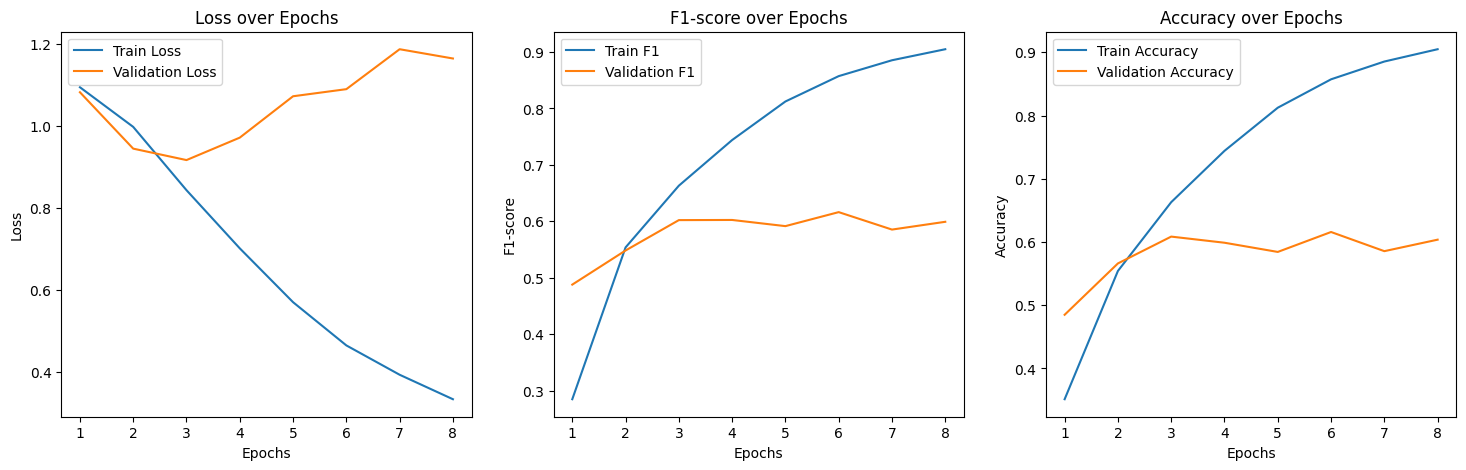


Resultados de la evaluación:
Accuracy:  0.6354
Precision: 0.6305
Recall:    0.6354
F1 Score:  0.6304

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       242
           1       0.65      0.74      0.69       336
           2       0.53      0.43      0.48       168

    accuracy                           0.64       746
   macro avg       0.62      0.60      0.61       746
weighted avg       0.63      0.64      0.63       746



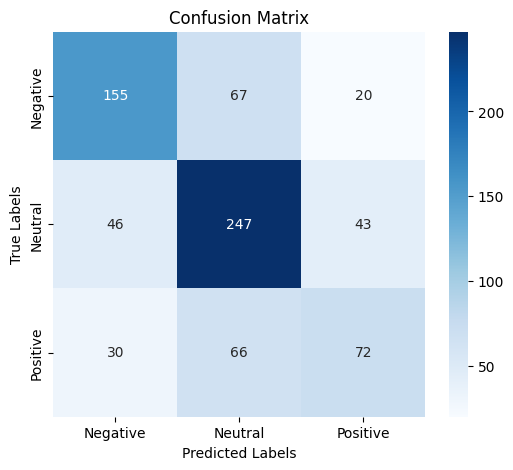

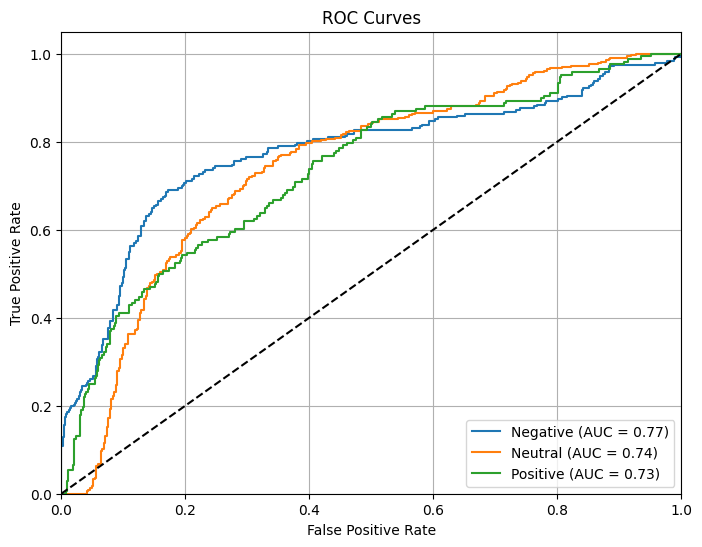

In [33]:
# Competición de MELD
best_model_name_MELD, best_model_MELD, all_results_MELD = run_model_competition(competition_dict_MELD)

# Se calcula su máximo de largo por texto
max_len_best_MELD =  measure_max_len(tokenizers[best_model_name_MELD], [text_train_MELD, text_dev_MELD, text_test_MELD], 'MELD', best_model_name_MELD)

# Se encuentran sus mejores hiperparámetros
best_params_MELD = grid_search_hyperparameters(model_names[best_model_name_MELD], 
                                               tokenizers[best_model_name_MELD], 
                                               text_train_MELD, 
                                               features_train_MELD, 
                                               labels_train_MELD, 
                                               text_dev_MELD, 
                                               features_dev_MELD, 
                                               labels_dev_MELD, 
                                               max_len_best_MELD)
# Se generan los mejores datasets
train_dataset_best_MELD = SentimentDataset(text_train_MELD, features_train_MELD, labels_train_MELD, tokenizers[best_model_name_MELD], max_len_best_MELD)
dev_dataset_best_MELD = SentimentDataset(text_dev_MELD, features_dev_MELD, labels_dev_MELD, tokenizers[best_model_name_MELD], max_len_best_MELD)
test_dataset_best_MELD = SentimentDataset(text_test_MELD, features_test_MELD, labels_test_MELD, tokenizers[best_model_name_MELD], max_len_best_MELD)

# Se generan los mejores dataloaders
train_dataloader_best_MELD = DataLoader(train_dataset_best_MELD, batch_size = best_params_MELD['batch_size'], shuffle = True)
dev_dataloader_best_MELD = DataLoader(dev_dataset_best_MELD, batch_size = best_params_MELD['batch_size'])
test_dataloader_best_MELD = DataLoader(test_dataset_best_MELD, batch_size = best_params_MELD['batch_size'])

# Se entrena el modelo con los mejores hiperparámetros
device = 'cuda'
best_model_to_train_MELD = HybridTransformerClassifier(model_names[best_model_name_MELD], num_features = features_train_MELD.shape[1])

best_trained_model_MELD, _ = train_and_evaluate(best_model_to_train_MELD, 
                                                train_dataloader_best_MELD,
                                                dev_dataloader_best_MELD,
                                                labels_train_MELD,
                                                device = device, 
                                                epochs = best_params_MELD['epochs'],
                                                lr = best_params_MELD['learning_rate'],
                                                freeze_epochs = 1,
                                                patience = 2)

# Se predice con el mejor modelo para evaluar su rendimiento
y_pred_best_MELD, y_prob_best_MELD = predict(best_trained_model_MELD, test_dataloader_best_MELD, device)
evaluate_predictions(labels_test_MELD, y_pred_best_MELD, y_prob_best_MELD, labels_names = ['Negative', 'Neutral', 'Positive'])

# Se calculan las predicciones de train y dev para el mejor modelo en MELD
_, y_prob_train_MELD = predict(best_trained_model_MELD, train_dataloader_best_MELD, device)
_, y_prob_dev_MELD = predict(best_trained_model_MELD, dev_dataloader_best_MELD, device)

# Se listan los paths originales y finales y las predicciones de MELD
list_original_paths_MELD = ['/kaggle/working/MELD_train.csv', '/kaggle/working/MELD_dev.csv', '/kaggle/working/MELD_test.csv']
list_output_paths_MELD = ['MELD_train_with_preds.csv', 'MELD_dev_with_preds.csv', 'MELD_test_with_preds.csv']
predictions_MELD = [y_prob_train_MELD, y_prob_dev_MELD, y_prob_best_MELD]

# Se guardan las predicciones y el mejor modelo
save_preds_and_best_model(list_original_paths_MELD, list_output_paths_MELD, "best_model_MELD.pth", predictions_MELD, best_trained_model_MELD)

Entrenando el modelo bertweet
New best model saved with F1: 0.1813
New best model saved with F1: 0.6127
New best model saved with F1: 0.6200
New best model saved with F1: 0.6295
New best model saved with F1: 0.6363
bertweet - ACC: 0.6340 - F1-macro: 0.6030

Entrenando el modelo twitter-roberta
New best model saved with F1: 0.2139
New best model saved with F1: 0.5956
New best model saved with F1: 0.6119
New best model saved with F1: 0.6181
twitter-roberta - ACC: 0.6067 - F1-macro: 0.5758


Mejor modelo: bertweet con F1-macro: 0.6030
Max token length for MOSEI: 163
Model bertweet max token length: 128

 Epoch 1


100%|██████████| 744/744 [02:53<00:00,  4.28it/s]


Train Loss: 5.2687, ACC: 0.3414, F1-score: 0.3406
Val Loss: 1.0223, ACC: 0.5208, F1-score: 0.4404
New best model saved with F1: 0.4404

 Epoch 2


100%|██████████| 744/744 [08:15<00:00,  1.50it/s]


Train Loss: 1.1244, ACC: 0.4851, F1-score: 0.4849
Val Loss: 0.9200, ACC: 0.5870, F1-score: 0.5894
New best model saved with F1: 0.5894

 Epoch 3


100%|██████████| 744/744 [08:15<00:00,  1.50it/s]


Train Loss: 0.8871, ACC: 0.6143, F1-score: 0.6153
Val Loss: 0.8279, ACC: 0.6351, F1-score: 0.6404
New best model saved with F1: 0.6404

 Epoch 4


100%|██████████| 744/744 [08:15<00:00,  1.50it/s]


Train Loss: 0.9537, ACC: 0.5304, F1-score: 0.5299
Val Loss: 1.0806, ACC: 0.3539, F1-score: 0.3274

 Epoch 5


100%|██████████| 744/744 [08:15<00:00,  1.50it/s]


Train Loss: 1.0796, ACC: 0.4053, F1-score: 0.3809
Val Loss: 1.0728, ACC: 0.3189, F1-score: 0.2316
Early stopping triggered.


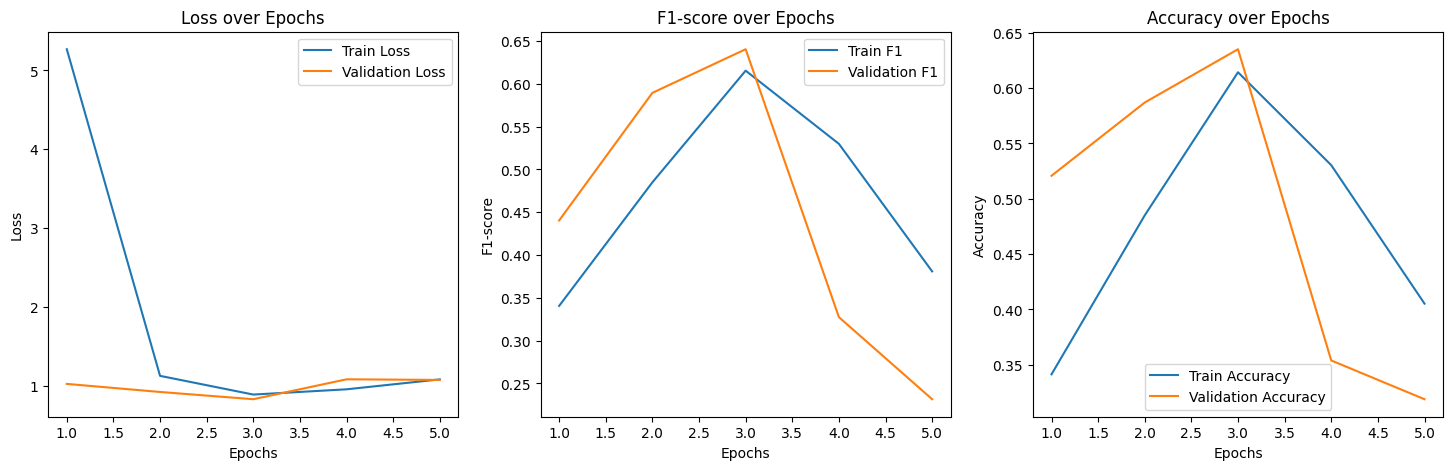


Resultados de la evaluación:
Accuracy:  0.3143
Precision: 0.4608
Recall:    0.3143
F1 Score:  0.2373

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      1303
           1       0.23      0.75      0.35       989
           2       0.53      0.02      0.03      2254

    accuracy                           0.31      4546
   macro avg       0.43      0.42      0.30      4546
weighted avg       0.46      0.31      0.24      4546



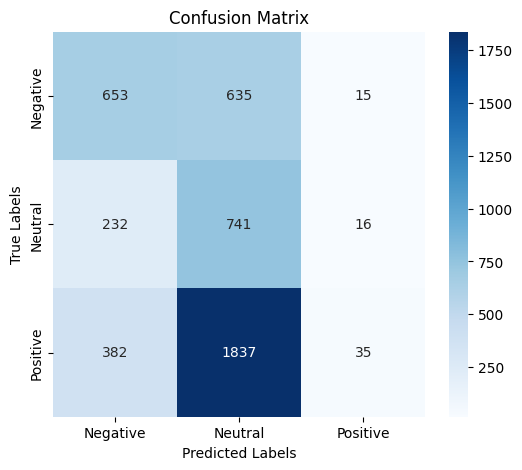

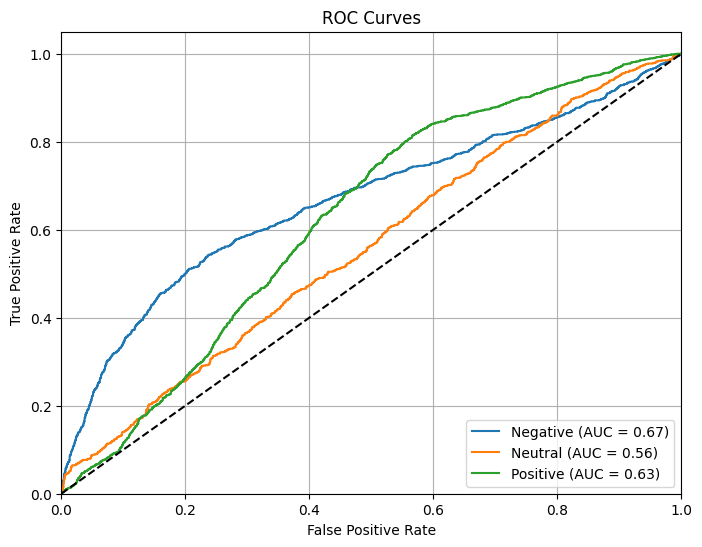

In [34]:
# Competición de MOSEI
best_model_name_MOSEI, best_model_MOSEI, all_results_MOSEI = run_model_competition(competition_dict_MOSEI)

# Se calcula su máximo de largo por texto
max_len_best_MOSEI =  measure_max_len(tokenizers['bertweet'], [text_train_MOSEI, text_dev_MOSEI, text_test_MOSEI], 'MOSEI', 'bertweet')

# Se encuentran sus mejores hiperparámetros
best_params_MOSEI = grid_search_hyperparameters(model_names[best_model_name_MOSEI], 
                                               tokenizers[best_model_name_MOSEI], 
                                               text_train_MOSEI, 
                                               features_train_MOSEI, 
                                               labels_train_MOSEI, 
                                               text_dev_MOSEI, 
                                               features_dev_MOSEI, 
                                               labels_dev_MOSEI, 
                                               max_len_best_MOSEI,
                                               verbose = False)

# Se generan los mejores datasets
train_dataset_best_MOSEI = SentimentDataset(text_train_MOSEI, features_train_MOSEI, labels_train_MOSEI, tokenizers['bertweet'], max_len_best_MOSEI)
dev_dataset_best_MOSEI = SentimentDataset(text_dev_MOSEI, features_dev_MOSEI, labels_dev_MOSEI, tokenizers['bertweet'], max_len_best_MOSEI)
test_dataset_best_MOSEI = SentimentDataset(text_test_MOSEI, features_test_MOSEI, labels_test_MOSEI, tokenizers['bertweet'], max_len_best_MOSEI)

# Se generan los mejores dataloaders
train_dataloader_best_MOSEI = DataLoader(train_dataset_best_MOSEI, batch_size = best_params_MOSEI['batch_size'], shuffle = True)
dev_dataloader_best_MOSEI = DataLoader(dev_dataset_best_MOSEI, batch_size = best_params_MOSEI['batch_size'])
test_dataloader_best_MOSEI = DataLoader(test_dataset_best_MOSEI, batch_size = best_params_MOSEI['batch_size'])

# Se entrena el modelo con los mejores hiperparámetros
device = 'cuda'
best_model_to_train_MOSEI = HybridTransformerClassifier(model_names[best_model_name_MOSEI], num_features = features_train_MOSEI.shape[1])

best_trained_model_MOSEI, _ = train_and_evaluate(best_model_to_train_MOSEI, 
                                                train_dataloader_best_MOSEI,
                                                dev_dataloader_best_MOSEI,
                                                labels_train_MOSEI,
                                                device = device, 
                                                epochs = best_params_MOSEI['epochs'],
                                                lr = best_params_MOSEI['learning_rate'],
                                                freeze_epochs = 1,
                                                patience = 2)

# Se predice con el mejor modelo para evaluar su rendimiento
y_pred_best_MOSEI, y_prob_best_MOSEI = predict(best_trained_model_MOSEI, test_dataloader_best_MOSEI, device)
evaluate_predictions(labels_test_MOSEI, y_pred_best_MOSEI, y_prob_best_MOSEI, labels_names = ['Negative', 'Neutral', 'Positive'])

# Se calculan las predicciones de train y dev para el mejor modelo en MOSEI
_, y_prob_train_MOSEI = predict(best_trained_model_MOSEI, train_dataloader_best_MOSEI, device)
_, y_prob_dev_MOSEI = predict(best_trained_model_MOSEI, dev_dataloader_best_MOSEI, device)

# Se listan los paths originales y finales y las predicciones de MOSEI
list_original_paths_MOSEI = ['/kaggle/working/MOSEI_train.csv', '/kaggle/working/MOSEI_dev.csv', '/kaggle/working/MOSEI_test.csv']
list_output_paths_MOSEI = ['MOSEI_train_with_preds.csv', 'MOSEI_dev_with_preds.csv', 'MOSEI_test_with_preds.csv']
predictions_MOSEI = [y_prob_train_MOSEI, y_prob_dev_MOSEI, y_prob_best_MOSEI]

# Se guardan las predicciones y el mejor modelo
save_preds_and_best_model(list_original_paths_MOSEI, list_output_paths_MOSEI, "best_model_MOSEI.pth", predictions_MOSEI, best_trained_model_MOSEI)

# Emotion recognition en Audio

## Carga de los CSVs

In [2]:
#from utils import *

# Para MELD
df_train_audio_MELD = pd.read_csv("/kaggle/working/MELD_train_with_preds.csv")
df_dev_audio_MELD = pd.read_csv("/kaggle/working/MELD_dev_with_preds.csv")
df_test_audio_MELD = pd.read_csv("/kaggle/working/MELD_test_with_preds.csv")

# Para MOSEI
df_train_audio_MOSEI = pd.read_csv("/kaggle/working/MOSEI_train_with_preds.csv")
df_dev_audio_MOSEI = pd.read_csv("/kaggle/working/MOSEI_dev_with_preds.csv")
df_test_audio_MOSEI = pd.read_csv("/kaggle/working/MOSEI_test_with_preds.csv")

## Creación de los Espectrogramas de Mel

In [3]:
# Se crean los Espectrogramas de Mel para
# MELD
#df_train_mel_MOSEI = process_in_chunks(df_train_audio_MOSEI, 'mel_spectrograms/mosei_train/', 'MOSEI_train_spectrograms.csv', chunk_size = 5000)
df_train_mel_MELD = load_df_or_create_mel_spectrograms(df_train_audio_MELD, 'mel_spectrograms/meld_train/', 'MELD_train_spectrograms.csv')
df_dev_mel_MELD = load_df_or_create_mel_spectrograms(df_dev_audio_MELD, 'mel_spectrograms/meld_dev/', 'MELD_dev_spectrograms.csv')
df_test_mel_MELD = load_df_or_create_mel_spectrograms(df_test_audio_MELD, 'mel_spectrograms/meld_test/', 'MELD_test_spectrograms.csv')

# MOSEI
df_train_mel_MOSEI = load_df_or_create_mel_spectrograms(df_train_audio_MOSEI, 'mel_spectrograms/mosei_train/', 'MOSEI_train_spectrograms.csv')
df_dev_mel_MOSEI = load_df_or_create_mel_spectrograms(df_dev_audio_MOSEI, 'mel_spectrograms/mosei_dev/', 'MOSEI_dev_spectrograms.csv')
df_test_mel_MOSEI = load_df_or_create_mel_spectrograms(df_test_audio_MOSEI, 'mel_spectrograms/mosei_test/', 'MOSEI_test_spectrograms.csv')

Cargando CSV procesado desde /kaggle/working/MELD_train_spectrograms.csv...
Cargando CSV procesado desde /kaggle/working/MELD_dev_spectrograms.csv...
Cargando CSV procesado desde /kaggle/working/MELD_test_spectrograms.csv...
Cargando CSV procesado desde /kaggle/working/MOSEI_train_spectrograms.csv...
Cargando CSV procesado desde /kaggle/working/MOSEI_dev_spectrograms.csv...
Cargando CSV procesado desde /kaggle/working/MOSEI_test_spectrograms.csv...


In [4]:
# Se actualizan los paths de cada espectrograma de Mel al del nuevo dataset de Kaggle
# MELD
df_train_mel_MELD['mel_path'] = df_train_mel_MELD['mel_path'].apply(lambda x: '/kaggle/input/spectrograms/final_specs/meld_train' + x[x.rfind('/dia'):])
df_dev_mel_MELD['mel_path'] = df_dev_mel_MELD['mel_path'].apply(lambda x: '/kaggle/input/spectrograms/final_specs/meld_dev' + x[x.rfind('/dia'):])
df_test_mel_MELD['mel_path'] = df_test_mel_MELD['mel_path'].apply(lambda x: '/kaggle/input/spectrograms/final_specs/meld_test' + x[x.rfind('/dia'):])

# MOSEI
df_train_mel_MOSEI['mel_path'] = df_train_mel_MOSEI['mel_path'].apply(lambda x: '/kaggle/input/spectrograms/final_specs/mosei_train/' + x.split('/')[-1])
df_dev_mel_MOSEI['mel_path'] = df_dev_mel_MOSEI['mel_path'].apply(lambda x: '/kaggle/input/spectrograms/final_specs/mosei_dev/' + x.split('/')[-1])
df_test_mel_MOSEI['mel_path'] = df_test_mel_MOSEI['mel_path'].apply(lambda x: '/kaggle/input/spectrograms/final_specs/mosei_test/' + x.split('/')[-1])

In [5]:
# MELD
df_train_mel_MELD.to_csv('MELD_train_audio.csv', index = False)
df_dev_mel_MELD.to_csv('MELD_dev_audio.csv', index = False)
df_test_mel_MELD.to_csv('MELD_test_audio.csv', index = False)

# MOSEI
df_train_mel_MOSEI.to_csv('MOSEI_train_audio.csv', index = False)
df_dev_mel_MOSEI.to_csv('MOSEI_dev_audio.csv', index = False)
df_test_mel_MOSEI.to_csv('MOSEI_test_audio.csv', index = False)

### Generación de los Datasets

In [6]:
features_audio_MELD = ['duration',  
                      'dialogue_id_norm', 
                      'utterance_id_norm', 
                      'season_norm',
                      'polarity',
                      'subjectivity', 
                      'pred_negative', 
                      'pred_neutral',
                      'pred_positive']
train_audio_dataset_MELD = EmotionDataset(df_train_mel_MELD, extra_features_cols = features_audio_MELD, label_cols = 'Emotion', multi_label = False)
dev_audio_dataset_MELD = EmotionDataset(df_dev_mel_MELD, extra_features_cols = features_audio_MELD, label_cols = 'Emotion', multi_label = False)
test_audio_dataset_MELD = EmotionDataset(df_test_mel_MELD, extra_features_cols = features_audio_MELD, label_cols = 'Emotion', multi_label = False)


features_audio_MOSEI = ['start_time', 
                       'end_time', 
                       'video_encoded', 
                       'duration', 
                       'intensity', 
                       'dominant_emotion', 
                       'positive_emotions', 
                       'polarity',
                       'subjectivity',
                       'pred_negative', 
                       'pred_neutral',
                       'pred_positive']
label_cols_MOSEI = ['happy',
                    'sad',
                    'anger',
                    'surprise',
                    'disgust',
                    'fear',
                    'neutral']
train_audio_dataset_MOSEI = EmotionDataset(df_train_mel_MOSEI, extra_features_cols = features_audio_MOSEI, label_cols = label_cols_MOSEI, multi_label = True)
dev_audio_dataset_MOSEI = EmotionDataset(df_dev_mel_MOSEI, extra_features_cols = features_audio_MOSEI, label_cols = label_cols_MOSEI, multi_label = True)
test_audio_dataset_MOSEI = EmotionDataset(df_test_mel_MOSEI, extra_features_cols = features_audio_MOSEI, label_cols = label_cols_MOSEI, multi_label = True)

### Creación de los DataLoaders de Audio

In [7]:
# MELD
train_audio_dataloader_MELD = DataLoader(train_audio_dataset_MELD, batch_size = 32, shuffle = True, num_workers = 2)
dev_audio_dataloader_MELD = DataLoader(dev_audio_dataset_MELD, batch_size = 32, shuffle = False, num_workers = 2)
test_audio_dataloader_MELD = DataLoader(test_audio_dataset_MELD, batch_size = 32, shuffle = False, num_workers = 2)

# MOSEI
train_audio_dataloader_MOSEI = DataLoader(train_audio_dataset_MOSEI, batch_size = 32, shuffle = True, num_workers = 2)
dev_audio_dataloader_MOSEI = DataLoader(dev_audio_dataset_MOSEI, batch_size = 32, shuffle = False, num_workers = 2)
test_audio_dataloader_MOSEI = DataLoader(test_audio_dataset_MOSEI, batch_size = 32, shuffle = False, num_workers = 2)

## Entrenamiento en Audio

In [8]:
# Se definen los diccionarios de la competición de audio para
# MELD
audio_competition_dict_MELD = {
    "efficientnet_b0": [
        EmotionModel(backbone_name = 'efficientnet_b0', num_extra_features = len(features_audio_MELD)),
        train_audio_dataloader_MELD,
        dev_audio_dataloader_MELD
    ],
    "vgg16": [
        EmotionModel(backbone_name = 'vgg16', num_extra_features = len(features_audio_MELD)),
        train_audio_dataloader_MELD,
        dev_audio_dataloader_MELD
    ]    
}

# MOSEI
audio_competition_dict_MOSEI = {
    "efficientnet_b0": [
        EmotionModel(backbone_name = 'efficientnet_b0', num_extra_features = len(features_audio_MOSEI)),
        train_audio_dataloader_MOSEI,
        dev_audio_dataloader_MOSEI
    ],
    "vgg16": [
        EmotionModel(backbone_name = 'vgg16', num_extra_features = len(features_audio_MOSEI)),
        train_audio_dataloader_MOSEI,
        dev_audio_dataloader_MOSEI
    ]
    
}

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 137MB/s]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 232MB/s] 


In [12]:
# Competición de MELD
best_audio_model_name_MELD, best_audio_model_MELD, all_audio_results_MELD = run_audio_model_competition(audio_competition_dict_MELD, epochs = 3)

Entrenando modelo efficientnet_b0...
New best model saved with F1: 0.2002
Early stopping triggered.
efficientnet_b0 - F1-Score: 0.2002

Entrenando modelo vgg16...
New best model saved with F1: 0.0400
New best model saved with F1: 0.0747
New best model saved with F1: 0.1613
vgg16 - F1-Score: 0.1613


Mejor modelo: efficientnet_b0 con F1-score: 0.2002


In [17]:
# Se encuentran sus mejores hiperparámetros
best_audio_params_MELD = grid_search_audio_hyperparameters(best_audio_model_name_MELD,
                                                           train_audio_dataset_MELD, 
                                                           dev_audio_dataset_MELD, 
                                                           len(features_audio_MELD))


 Combinación a probar: batch = 32, epochs = 8, LR = 0.0001
New best model saved with F1: 0.1790
New best model saved with F1: 0.1796
New best model saved with F1: 0.1986
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 8, LR = 5e-05
New best model saved with F1: 0.1511
New best model saved with F1: 0.1846
New best model saved with F1: 0.1905
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 10, LR = 0.0001
New best model saved with F1: 0.1664
New best model saved with F1: 0.1882
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 10, LR = 5e-05
New best model saved with F1: 0.1734
New best model saved with F1: 0.1861
New best model saved with F1: 0.1912
New best model saved with F1: 0.2035
Early stopping triggered.

 Combinación a probar: batch = 64, epochs = 8, LR = 0.0001
New best model saved with F1: 0.1901
New best model saved with F1: 0.1971
Early stopping triggered.

 Combinación a probar: batch = 64, epochs = 8, LR =


 Epoch 0
Train Loss: 1.4775, ACC: 0.4328 F1-score: 0.2088
Val Loss: 1.8733, ACC: 0.2731 F1-score: 0.1621
New best model saved with F1: 0.1621

 Epoch 1
Train Loss: 0.9397, ACC: 0.6699 F1-score: 0.4868
Val Loss: 1.8704, ACC: 0.3677 F1-score: 0.2104
New best model saved with F1: 0.2104

 Epoch 2
Train Loss: 0.6219, ACC: 0.7863 F1-score: 0.6471
Val Loss: 2.0135, ACC: 0.3689 F1-score: 0.1846

 Epoch 3
Train Loss: 0.4360, ACC: 0.8516 F1-score: 0.7553
Val Loss: 2.3077, ACC: 0.3689 F1-score: 0.1920
Early stopping triggered.


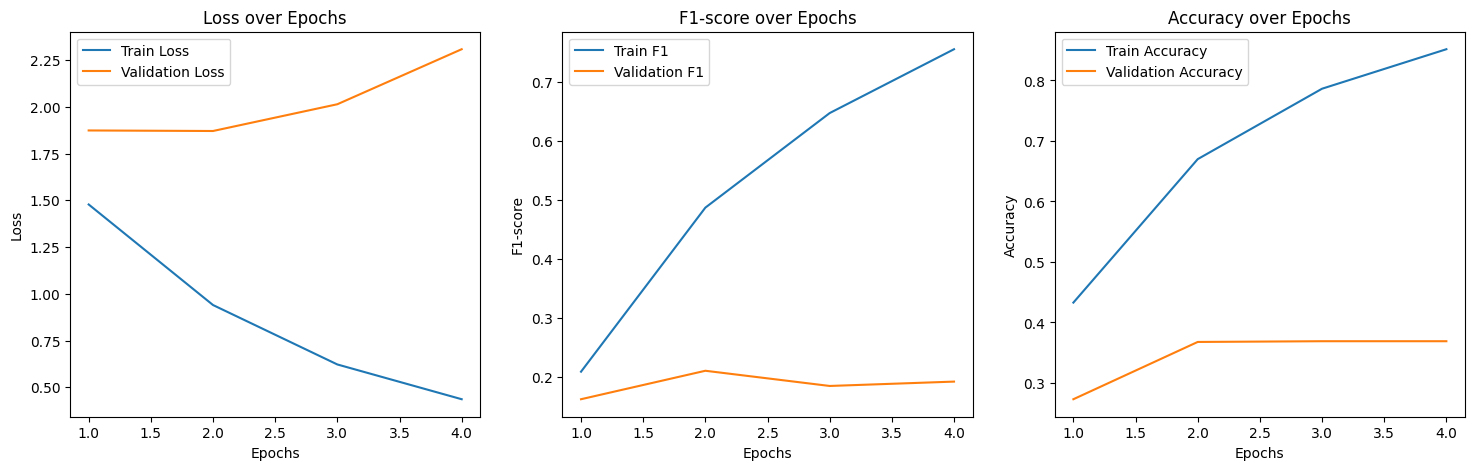

In [21]:
# Se generan los mejores dataloaders
train_audio_dataloader_best_MELD = DataLoader(train_audio_dataset_MELD, batch_size = best_audio_params_MELD['batch_size'], shuffle = True, num_workers = 2)
dev_audio_dataloader_best_MELD = DataLoader(dev_audio_dataset_MELD, batch_size = best_audio_params_MELD['batch_size'], shuffle = False, num_workers = 2)
test_audio_dataloader_best_MELD = DataLoader(test_audio_dataset_MELD, batch_size = best_audio_params_MELD['batch_size'], shuffle = False, num_workers = 2)

# Se entrena el modelo con los mejores hiperparámetros
device = 'cuda'
best_audio_model_to_train_MELD =  EmotionModel(backbone_name = best_audio_model_name_MELD, 
                                               num_extra_features = len(features_audio_MELD))

best_audio_trained_model_MELD, _ = train_and_evaluate_audio(best_audio_model_to_train_MELD,
                                                         train_audio_dataloader_best_MELD,
                                                         dev_audio_dataloader_best_MELD,
                                                         num_epochs = best_audio_params_MELD['epochs'],
                                                         lr = best_audio_params_MELD['learning_rate'])


Resultados de la evaluación:
Accuracy:  0.3928
Precision: 0.3175
Recall:    0.3928
F1 Score:  0.3405

Classification Report:
              precision    recall  f1-score   support

       anger       0.30      0.18      0.23        95
     disgust       0.00      0.00      0.00        22
        fear       0.00      0.00      0.00        27
         joy       0.21      0.23      0.22       133
     neutral       0.49      0.71      0.58       336
     sadness       0.10      0.03      0.05        58
    surprise       0.14      0.05      0.08        75

    accuracy                           0.39       746
   macro avg       0.18      0.17      0.16       746
weighted avg       0.32      0.39      0.34       746



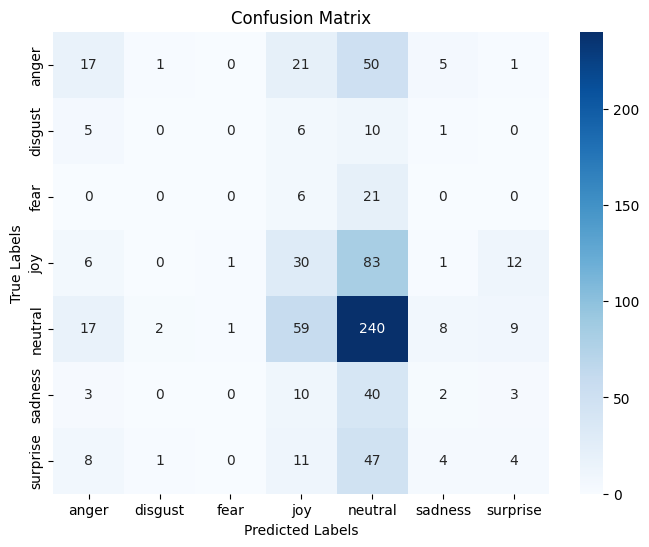

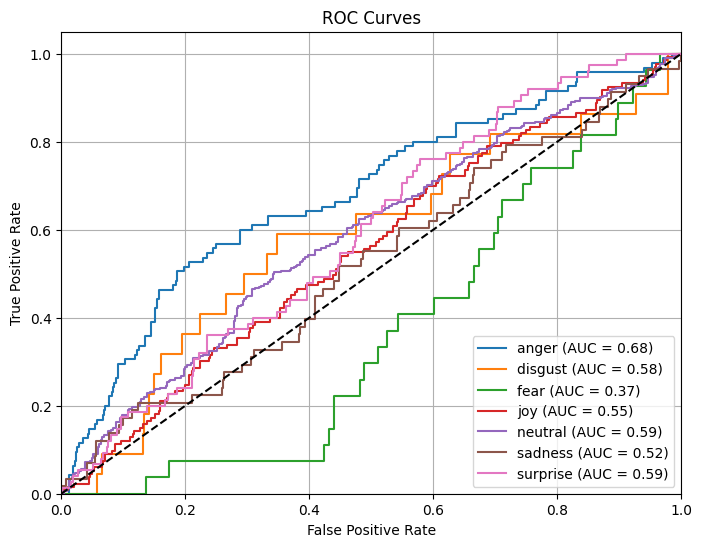

In [22]:
# Se predice con el mejor modelo para evaluar su rendimiento
y_pred_best_audio_MELD, y_prob_best_audio_MELD = predict_audio(best_audio_trained_model_MELD, test_audio_dataloader_best_MELD, device)
evaluate_audio_predictions(df_test_mel_MELD['Emotion'], y_pred_best_audio_MELD, y_prob_best_audio_MELD, ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'])

# Se calculan las predicciones de train y dev para el mejor modelo en MELD
_, y_prob_audio_train_MELD = predict_audio(best_audio_trained_model_MELD, train_audio_dataloader_best_MELD, device)
_, y_prob_audio_dev_MELD = predict_audio(best_audio_trained_model_MELD, dev_audio_dataloader_best_MELD, device)

# Se listan los paths originales y finales y las predicciones de MELD
list_audio_original_paths_MELD = ['/kaggle/working/MELD_train_audio.csv', '/kaggle/working/MELD_dev_audio.csv', '/kaggle/working/MELD_test_audio.csv']
list_audio_output_paths_MELD = ['MELD_train_with_audio_preds.csv', 'MELD_dev_with_audio_preds.csv', 'MELD_test_with_audio_preds.csv']
audio_predictions_MELD = [y_prob_audio_train_MELD, y_prob_audio_dev_MELD, y_prob_best_audio_MELD]

# Se guardan las predicciones y el mejor modelo
save_preds_and_best_model(list_audio_original_paths_MELD, list_audio_output_paths_MELD, "best_audio_model_MELD.pth", audio_predictions_MELD, best_audio_trained_model_MELD)

In [25]:
# Competición de MELD
best_audio_model_name_MOSEI, best_audio_model_MOSEI, all_audio_results_MOSEI = run_audio_model_competition(audio_competition_dict_MOSEI, multilabel = True)

Entrenando modelo efficientnet_b0...
New best model saved with F1: 0.0719
New best model saved with F1: 0.0799
Early stopping triggered.
efficientnet_b0 - F1-Score: 0.0799

Entrenando modelo vgg16...
New best model saved with F1: 0.0134
Early stopping triggered.
vgg16 - F1-Score: 0.0134


Mejor modelo: efficientnet_b0 con F1-score: 0.0799


In [26]:
# Se encuentran sus mejores hiperparámetros
best_audio_params_MOSEI = grid_search_audio_hyperparameters(best_audio_model_name_MOSEI,
                                                            train_audio_dataset_MOSEI, 
                                                            dev_audio_dataset_MOSEI, 
                                                            len(features_audio_MOSEI),
                                                            multilabel = True)


 Combinación a probar: batch = 32, epochs = 8, LR = 0.0001
New best model saved with F1: 0.0292
New best model saved with F1: 0.0309
New best model saved with F1: 0.0612
New best model saved with F1: 0.0637
New best model saved with F1: 0.0774
New best model saved with F1: 0.0822
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 8, LR = 5e-05
New best model saved with F1: 0.0184
New best model saved with F1: 0.0193
New best model saved with F1: 0.0269
New best model saved with F1: 0.0329
New best model saved with F1: 0.0415
New best model saved with F1: 0.0488

 Combinación a probar: batch = 32, epochs = 10, LR = 0.0001
New best model saved with F1: 0.0169
New best model saved with F1: 0.0279
Early stopping triggered.

 Combinación a probar: batch = 32, epochs = 10, LR = 5e-05
New best model saved with F1: 0.0340
Early stopping triggered.

 Combinación a probar: batch = 64, epochs = 8, LR = 0.0001
New best model saved with F1: 0.0319
Early stopping triggered.

 Co


 Epoch 0
Train Loss: 0.3708, f1-score: 0.0813
Val Loss: 0.2486, AUC: 0.0160
New best model saved with F1: 0.0160

 Epoch 1
Train Loss: 0.1748, f1-score: 0.1351
Val Loss: 0.2479, AUC: 0.0207
New best model saved with F1: 0.0207

 Epoch 2
Train Loss: 0.1520, f1-score: 0.2199
Val Loss: 0.2494, AUC: 0.0351
New best model saved with F1: 0.0351

 Epoch 3
Train Loss: 0.1383, f1-score: 0.3029
Val Loss: 0.2691, AUC: 0.0119

 Epoch 4
Train Loss: 0.1287, f1-score: 0.3919
Val Loss: 0.2534, AUC: 0.0226
Early stopping triggered.


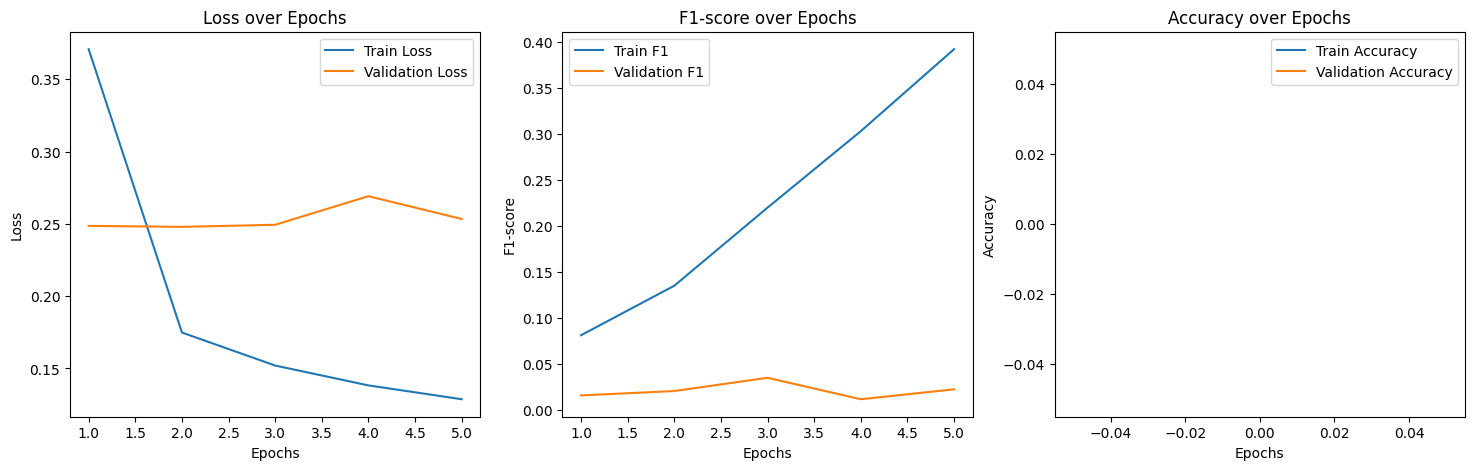

In [9]:
# Se generan los mejores dataloaders
train_audio_dataloader_best_MOSEI = DataLoader(train_audio_dataset_MOSEI, batch_size = best_audio_params_MOSEI['batch_size'], shuffle = True, num_workers = 2)
dev_audio_dataloader_best_MOSEI = DataLoader(dev_audio_dataset_MOSEI, batch_size = best_audio_params_MOSEI['batch_size'], shuffle = False, num_workers = 2)
test_audio_dataloader_best_MOSEI = DataLoader(test_audio_dataset_MOSEI, batch_size = best_audio_params_MOSEI['batch_size'], shuffle = False, num_workers = 2)

# Se entrena el modelo con los mejores hiperparámetros
device = 'cuda'
best_audio_model_to_train_MOSEI =  EmotionModel(backbone_name = best_audio_model_name_MOSEI, 
                                                num_extra_features = len(features_audio_MOSEI))

best_audio_trained_model_MOSEI, _ = train_and_evaluate_audio(best_audio_model_to_train_MOSEI,
                                                         train_audio_dataloader_best_MOSEI,
                                                         dev_audio_dataloader_best_MOSEI,
                                                         num_epochs = best_audio_params_MOSEI['epochs'],
                                                         lr = best_audio_params_MOSEI['learning_rate'],
                                                         multilabel = True)


Resultados multilabel (por clase):
happy: ACC = 0.9120, Precision = 0.4000, Recall = 0.0101, F1 = 0.0196
sad: ACC = 0.9881, Precision = 0.0000, Recall = 0.0000, F1 = 0.0000
anger: ACC = 0.9890, Precision = 0.5000, Recall = 0.0400, F1 = 0.0741
surprise: ACC = 0.9982, Precision = 0.0000, Recall = 0.0000, F1 = 0.0000
disgust: ACC = 0.9894, Precision = 0.0000, Recall = 0.0000, F1 = 0.0000
fear: ACC = 0.9628, Precision = 0.0000, Recall = 0.0000, F1 = 0.0000
neutral: ACC = 0.8330, Precision = 0.3292, Recall = 0.1167, F1 = 0.1723

AUC para cada clase:
happy AUC no disponible
sad AUC no disponible
anger AUC no disponible
surprise AUC no disponible
disgust AUC no disponible
fear AUC no disponible
neutral AUC = 0.70


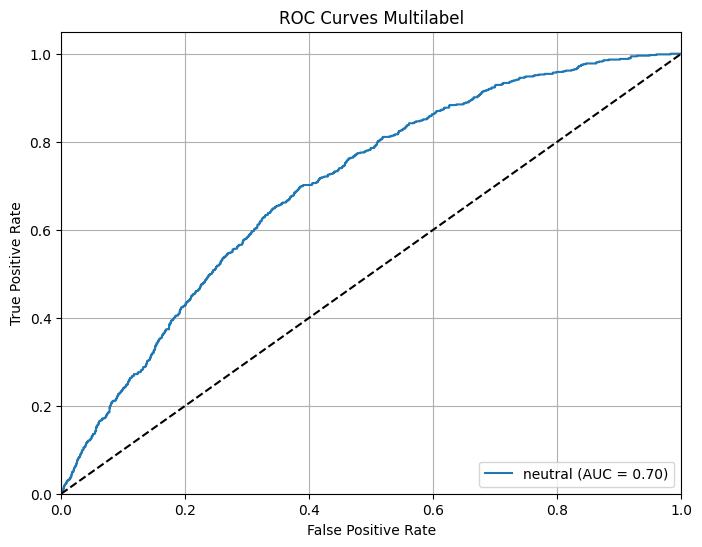

In [11]:
# Se predice con el mejor modelo para evaluar su rendimiento
y_pred_best_audio_MOSEI, y_prob_best_audio_MOSEI = predict_audio(best_audio_trained_model_MOSEI, test_audio_dataloader_best_MOSEI, device, multilabel = True)
evaluate_audio_predictions(df_test_mel_MOSEI[label_cols_MOSEI], y_pred_best_audio_MOSEI, y_prob_best_audio_MOSEI, label_cols_MOSEI, multilabel=True)

# Se calculan las predicciones de train y dev para el mejor modelo en MOSEI
_, y_prob_audio_train_MOSEI = predict_audio(best_audio_trained_model_MOSEI, train_audio_dataloader_best_MOSEI, device, multilabel = True)
_, y_prob_audio_dev_MOSEI = predict_audio(best_audio_trained_model_MOSEI, dev_audio_dataloader_best_MOSEI, device, multilabel = True)

# Se listan los paths originales y finales y las predicciones de MOSEI
list_audio_original_paths_MOSEI = ['/kaggle/working/MOSEI_train_audio.csv', '/kaggle/working/MOSEI_dev_audio.csv', '/kaggle/working/MOSEI_test_audio.csv']
list_audio_output_paths_MOSEI = ['MOSEI_train_with_audio_preds.csv', 'MOSEI_dev_with_audio_preds.csv', 'MOSEI_test_with_audio_preds.csv']
audio_predictions_MOSEI = [y_prob_audio_train_MOSEI, y_prob_audio_dev_MOSEI, y_prob_best_audio_MOSEI]

# Se guardan las predicciones y el mejor modelo
save_preds_and_best_model(list_audio_original_paths_MOSEI, list_audio_output_paths_MOSEI, "best_audio_model_MOSEI.pth", audio_predictions_MOSEI, best_audio_trained_model_MOSEI)